In [1]:
# dependancies, parameters, and setup
# important paper do not forget:
# https://arxiv.org/pdf/1610.02415v1.pdf
import pandas as pd
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE

%matplotlib inline  

train_dir = "/home/ubuntu/Desktop/seq2seq/seq2seq_train_protein/"
data_dir = "/home/ubuntu/Desktop/seq2seq/protein_data/"

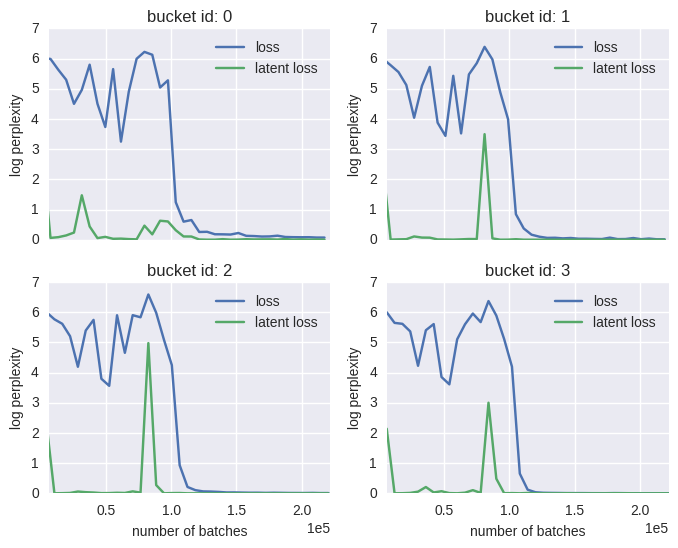

In [3]:
# error training summaries

# training error
df_train_er = pd.read_csv(train_dir + "error_train_log.txt",
                          names=["", "global step", "learning rate", "step time", "loss", "latent loss"],
                          sep=" ",
                          index_col=False
                         )
# step time
# df_train_er.plot(y=3, title="train step time")

# loss
# df_train_er.plot(y=4, title="train loss")

# latent_loss
# df_train_er.plot(y=5, title="train latent loss")

# testing error by bucket
df_test_er = pd.read_csv(train_dir + "error_test_log.txt",
                          names=["", "bucket_id", "loss", "latent loss"],
                          sep=" ",
                          index_col=False
                         )
df_test_er.index = list(range(1500,(df_test_er.shape[0]+1)*1500, 1500))

# df_test_er = df_test_er.iloc[:200,:]

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=False)
axes = [ax1, ax2, ax3, ax4]

for bucket_id in range(4):
  ax = axes[bucket_id]
  ax = df_test_er[df_test_er.bucket_id == bucket_id][["loss", "latent loss"]].plot(
    title="bucket id: " + str(bucket_id), ax=ax, figsize=(8, 6))
  ax.set_xlabel('number of batches', fontsize=10)
  ax.set_ylabel('log perplexity', fontsize = 10)
  ax.tick_params(axis='both', which='major', labelsize=10)
  ax.ticklabel_format(axis='both', style='sci', scilimits=(-4,4))

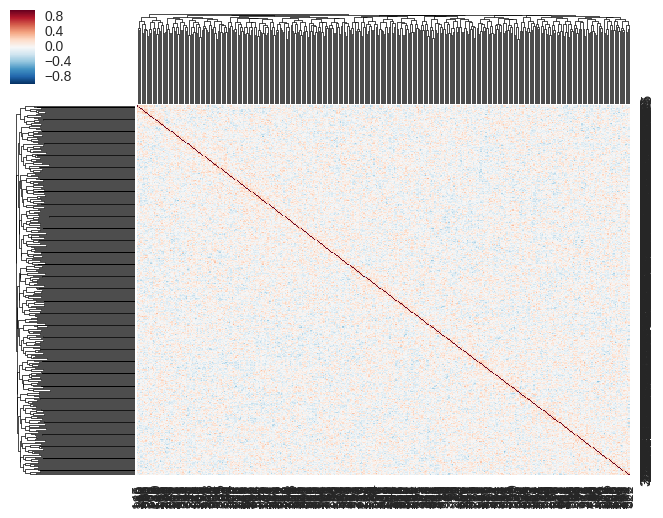

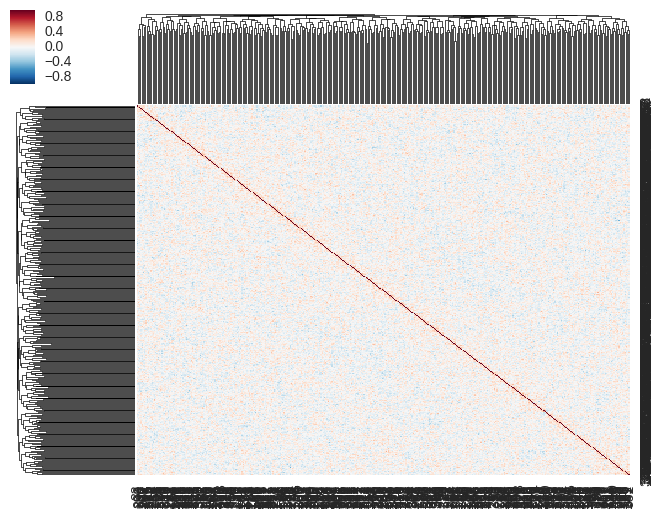

In [19]:
# visualize embeddings

# embeddings after batch 1,500
latent_df = pd.read_csv(train_dir + "embedd_df_1.csv", sep=" ")
ax = sns.clustermap(cosine_similarity(np.random.normal(size=latent_df.iloc[:,1:].values.shape)), figsize=(8, 6))

# embeddings after batch 171,000
latent_df = pd.read_csv(train_dir + "embedd_df_25501.csv", sep=" ")
ax = sns.clustermap(cosine_similarity(latent_df.iloc[:,1:].values), figsize=(8, 6))



In [12]:
latent_z.shape

(33, 41)

In [3]:
# visualize latent space distribution (by bucket)


latent_z = pd.read_csv(train_dir + "latent_z_3_99000.txt", sep=" ", header=None)
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
x, y = model.fit_transform(latent_z.iloc[]).T
plt.scatter(x, y)
# latent_z

ValueError: could not convert string to float: '31: AD NR RP IW VM GH MV NS LA QI DE FV NL GA NS IE TD VS FD RN CQ VL VV FD LK TG HR WQ FG GI TN KV LN EA AY\n'

In [18]:
# example translations
for bucket_id in range(4):
  print("Bucket " + str(bucket_id) + ": ")
  with open(train_dir + "batch_trans_25501_bucket_{}.txt".format(bucket_id)) as f_in:
    for l in f_in:
      tokens = l.strip().split(" ")
      last_tokens = [t for t in tokens[1:] if t not in ["_EOS", "_GO"]]
      s = "".join(last_tokens).replace("_UNK", "_")
      print(tokens[0] + " " + s)
  print("\n\n\n")

Bucket 0: 
0: MIFDGKVAIITGGGKAKSIGYGIAVAYA
0: MIFDGKVAIITGGGKAKSIGYGIAVAYAIA
0: MIFDVAVAIITGGGKAKSIGYGIAVAYAIA
0: MIFDVAVAIITGGGKAKSIGYGIAVAYAIAIA
1: MFHVLTLTYLCPLDVV_TRPAHV
1: MFHVLTLTYLCPLDVV_TRPAHV
1: MFHVLTLTYLCPLDVV_TRPAHV
1: MFHVLTLTYLCPLDVV_TRPAHV
2: MIFT_DRSAIE_
2: MISAFVSASAIE_
2: MISAFVSASAIE_
2: MISA_DRSAIE_
3: AGEPANNEDRFN
3: MPQKANNEDRFN
3: MPQKANNEDRFN
3: MPADANNEDRFN
4: LDVELTVEERNLLSVGYKDSTLIMQLLR
4: MFVELTVEERNLLSVGYKDSTLIMQLLR
4: MHVELTVEERNLLSVGYKDSTLIMQLLR
4: MQVELTVEERNLLSVGYKDSTLIMQLLR




Bucket 1: 
0: MSLYLLLGLKILRYLKMVIVLRCHSAFLLSVKFLREKRRLKMYLGIMLGF
0: MSLYLLLGLKILRYLKLIIVLRETSAFLLSVKFLREKRRLKMYLGIMLGFGFGFGFGF
0: MSLYLLLGLKILRYLKLIIVLRETSAFLLSVKFLREKRRLKMYLGIMLGFGFGFGFGF
0: MSLYLLLGLKILRYLKLIIVLRETSAFLLSVKFLREKRRLKMYLGIMLGFGFGFGFGF
1: MRGLEAPGAVGPTGPSGAPGSQGPDGDVGGMGPEGPKGDDGPVGPKGPQGAAIF
1: MRGLEAPGAVGPTGPSGAPGSQGPDGDVGGMGPEGPKGDDGPVGPKGPQGAAIFSL
1: MRGLEAPGAVGPTGPSGAPGSQGPDGDVGGMGPEGPKGDDGPVGPKGPQGAAIFSL
1: MRGLEAPGAVGPTGPSGAPGSQGPDGDVGGMGPEGPKGDDGPVGPKGPQGA